# Quickstart QE

This  notebook calculates and plots lensing quadratic estimators on a idealized, isotropic full-sky parameter file example, located here

* $PL2018/params/idealized_example.py

where $PL2018 is set the root of the repository. Checkout this parameter file for more explanations. Going through this notebook, several objects such as the QE's, responses, noise biases etc will be cached (if they were not already computed previously) into the following folder 

* $PL2018/temp/idealized_example

as defined in the parameter file. The same notebook can be run on other parameter files (such as the Planck SMICA reconstruction $PL2018/params/smicadx12_planck2018.py) provided they are structured in the same way.

**This example will only work on NERSC systems, as it uses CMB simulations located there.**

In [46]:
%matplotlib inline
import imp
parfile = imp.load_source('parfile', './params/idealized_example.py')

The next cell computes the lensing TT ('tt') estimator for the data (index '-1'.) map as defined in the parameter file. Indices 0, 1, ... point to the accompanying simulation set. In this idealized example the 'data' map is just an additional simulation. Both lensing gradient ('ptt') and curl ('xtt') estimators are computed and cached by a call to either of them. These estimates are unnormalized.

The implementation of these joint gradient-curl estimates is detailed in the Planck 2018 lensing paper https://arxiv.org/abs/1807.06210

In [41]:
qlm = parfile.qlms_dd.get_sim_qlm('ptt', -1)

We then calculate:

* the expected normalization ('qnorm', the inverse response) in the fiducial cosmology as defined in the parameter file.
* the semi-analytical noise estimate ('nhl'). This uses the empirical power spectra of the filtered CMB maps. (Note that this quick semi-analytical estimate is not highly accurate on the cut-sky.)

and plot the results against the expected signal and noise. We do the same for the curl mode.

The implementation of the semi-analytical noise biases and response calculations uses 1-dimensional integral involving Wigner small-d matrices. It is detailed in the **qresp.pdf** document in this repository.

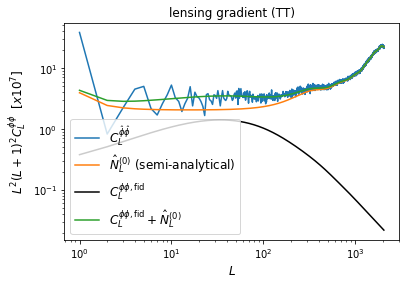

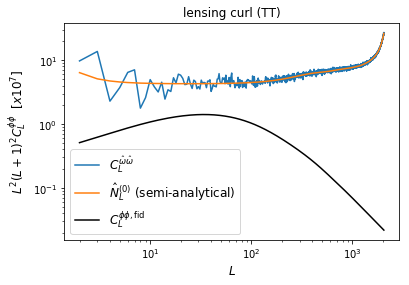

In [47]:
import healpy as hp
from plancklens2018 import utils

for qe_key in ['ptt', 'xtt']:
    # This loads the estimate calculated in the previous cell:
    qlm = parfile.qlms_dd.get_sim_qlm(qe_key, -1)

    # Lensing response according to the fiducial cosmology:
    qresp = parfile.qresp_dd.get_response(qe_key, 'p')

    
    # Estimator normalization is the inverse response:
    qnorm = utils.cli(qresp)
    
    # Semi-analytical realization-dependent Gaussian noise bias:
    nhl = parfile.nhl_dd.get_sim_nhl(-1, qe_key, qe_key)

    # and we plot the normalized resulting spectra:
    w = lambda ell : ell ** 2 * (ell + 1.) ** 2 * 0.5 / np.pi * 1e7
    ell = np.arange(2 if qe_key[0] == 'x' else 1, 2048)
    
    pl.figure()
    pl.title('lensing gradient (TT)' if qe_key[0] == 'p' else 'lensing curl (TT)')
    label=r'$C_L^{\hat \phi \hat \phi}$' if qe_key[0] == 'p' else r'$C_L^{\hat \omega \hat \omega}$'
    pl.loglog(ell, hp.alm2cl(qlm)[ell] * qnorm[ell] ** 2 / parfile.qlms_dd.fsky12 * w(ell), label=label)
    pl.loglog(ell, nhl[ell] * qnorm[ell] ** 2 * w(ell), label=r'$\hat N_L^{(0)}$ (semi-analytical)')
    pl.loglog(ell, parfile.cl_unl['pp'][ell] *  w(ell), c='k', label=r'$C_L^{\phi\phi, \rm fid}$')
    if  qe_key[0] == 'p':
        pl.loglog(ell, (parfile.cl_unl['pp'][ell] + nhl[ell] * qnorm[ell] ** 2) *  w(ell), label=r'$C_L^{\phi\phi, \rm fid} + \hat N_L^{(0)}$ ')
    pl.xlabel('$L$', fontsize=12)
    pl.ylabel('$L^2 (L + 1)^2 C_L^{\phi\phi}$  [$x10^7$]', fontsize=12)
    pl.legend(fontsize=12, loc='lower left')

This last cell does the exact same thing for the MV gradient (p) and curl (x) estimator.

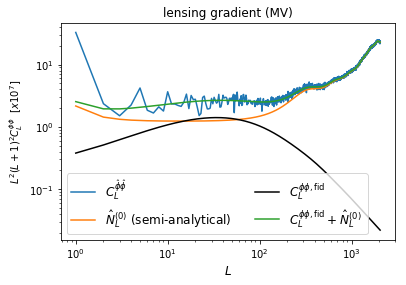

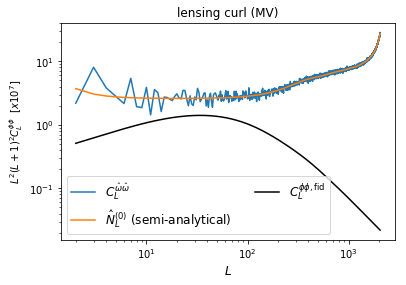

In [48]:
qlm = parfile.qlms_dd.get_sim_qlm('p', -1)
for qe_key in ['p', 'x']:
    qresp = parfile.qresp_dd.get_response(qe_key, 'p')
    qnorm = utils.cli(qresp)
    qlm = parfile.qlms_dd.get_sim_qlm(qe_key, -1)

    nhl = parfile.nhl_dd.get_sim_nhl(-1, qe_key, qe_key)

    w = lambda ell : ell ** 2 * (ell + 1.) ** 2 * 0.5 / np.pi * 1e7
    ell = np.arange(2 if qe_key[0] == 'x' else 1, 2048)
    
    pl.figure()
    pl.title('lensing gradient (MV)' if qe_key[0] == 'p' else 'lensing curl (MV)')
    label=r'$C_L^{\hat \phi \hat \phi}$' if qe_key[0] == 'p' else r'$C_L^{\hat \omega \hat \omega}$'
    pl.loglog(ell, hp.alm2cl(qlm)[ell] * qnorm[ell] ** 2 / parfile.qlms_dd.fsky12 * w(ell), label=label)
    pl.loglog(ell, nhl[ell] * qnorm[ell] ** 2 * w(ell), label=r'$\hat N_L^{(0)}$ (semi-analytical)')
    pl.loglog(ell, parfile.cl_unl['pp'][ell] *  w(ell), c='k', label=r'$C_L^{\phi\phi, \rm fid}$')
    if  qe_key[0] == 'p':
        pl.loglog(ell, (parfile.cl_unl['pp'][ell] + nhl[ell] * qnorm[ell] ** 2) *  w(ell), label=r'$C_L^{\phi\phi, \rm fid} + \hat N_L^{(0)}$ ')

    pl.xlabel('$L$', fontsize=12)
    pl.ylabel('$L^2 (L + 1)^2 C_L^{\phi\phi}$  [$x10^7$]')
    pl.legend(fontsize=12, ncol=2, loc='lower left')